<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">University of Memphis</p>
<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">Center for Earthquake Research and Information</p>
<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 24px; margin: 5px 0;">Homework 3</p>
<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">Introduction to Global Geophysics</p>
<p style="color:#C70039; text-align:center; font-weight: bold; margin: 2px 0;">Susana Delgado Andino</p>


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 1. a)

<p>Referring to the population equations for foxes and rabbits given in the lecture slides, numerically compute and plot the evolution of their populations for the following conditions and parameters:</p>

<ul>
    <li><strong>Initial conditions:</strong> \( R_0 = 100, \quad F_0 = 100 \)</li>
    <li><strong>Parameters (unit: days\(^{-1}\)):</strong></li>
</ul>

<p style="margin-left: 20px;">
    \( \beta_r = 0.01, \quad \delta_r = 0.005, \quad \beta_f = 0.005, \quad \delta_f = 0.01, \) <br>
    and \( \epsilon_r = \epsilon_f = 0.0001 \).
</p>


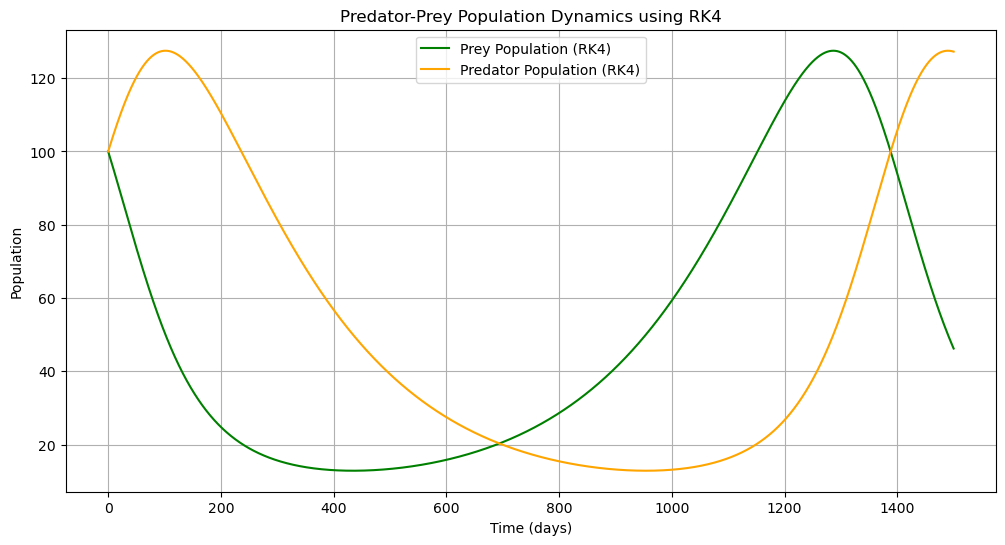

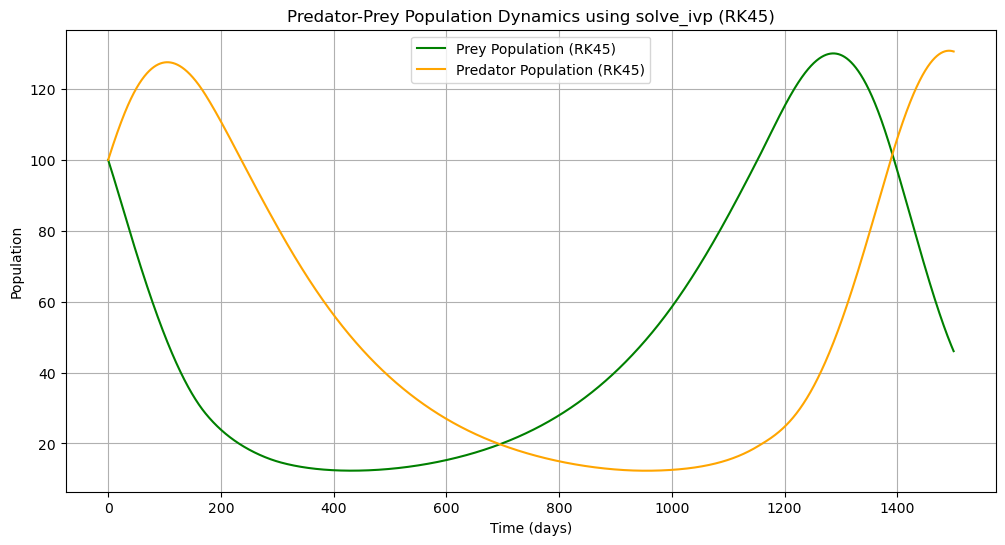

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define model parameters
prey_birth_rate = 0.01  # Birth rate of prey (rabbits)
predator_birth_rate = 0.005  # Birth rate of predators (foxes)
prey_death_rate = 0.005  # Natural death rate of prey
predator_death_rate = 0.01  # Natural death rate of predators
predation_rate = 0.0001  # Effect of predation on prey population
predator_growth_factor = 0.0001  # Growth contribution of predation to predator population

#Initial populations
prey_initial = 100  # Initial prey population
predator_initial = 100  # Initial predator population

#Time configuration
time_step = 0.1  # Step size in days
total_time = 1500  # Total duration in days
num_steps = int(total_time / time_step)  # Total number of steps

#Define the system of differential equations
def population_dynamics(t, populations):
    prey, predator = populations
    d_prey_dt = (prey_birth_rate * prey) - (prey_death_rate * prey) - (predation_rate * predator * prey)
    d_predator_dt = (predator_birth_rate * predator) - (predator_death_rate * predator) + (predator_growth_factor * predator * prey)
    return [d_prey_dt, d_predator_dt]

#Implement the Runge-Kutta 4th order method
def runge_kutta_4(func, initial_conditions, time_array):
    """Solves a system of ODEs using the 4th-order Runge-Kutta method"""
    n = len(time_array)
    solutions = np.zeros((n, len(initial_conditions)))
    solutions[0] = initial_conditions
    
    for i in range(1, n):
        step_size = time_array[i] - time_array[i - 1]
        k1 = np.array(func(time_array[i - 1], solutions[i - 1]))
        k2 = np.array(func(time_array[i - 1] + step_size / 2, solutions[i - 1] + step_size * k1 / 2))
        k3 = np.array(func(time_array[i - 1] + step_size / 2, solutions[i - 1] + step_size * k2 / 2))
        k4 = np.array(func(time_array[i - 1] + step_size, solutions[i - 1] + step_size * k3))
        solutions[i] = solutions[i - 1] + (step_size / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return solutions

#Solve using Runge-Kutta 4
time_values = np.linspace(0, total_time, num_steps)
population_rk4 = runge_kutta_4(population_dynamics, [prey_initial, predator_initial], time_values)

#Solve using scipy's solve_ivp (RK45)
solution_ivp = solve_ivp(population_dynamics, [0, total_time], [prey_initial, predator_initial], method='RK45', t_eval=time_values)

#Plot Runge-Kutta 4 results
plt.figure(figsize=(12, 6))
plt.plot(time_values, population_rk4[:, 0], label='Prey Population (RK4)', color='green')
plt.plot(time_values, population_rk4[:, 1], label='Predator Population (RK4)', color='orange')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Predator-Prey Population Dynamics using RK4')
plt.legend()
plt.grid()
plt.show()

#Plot solve_ivp (RK45) results
plt.figure(figsize=(12, 6))
plt.plot(solution_ivp.t, solution_ivp.y[0], label='Prey Population (RK45)', color='green')
plt.plot(solution_ivp.t, solution_ivp.y[1], label='Predator Population (RK45)', color='orange')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Predator-Prey Population Dynamics using solve_ivp (RK45)')
plt.legend()
plt.grid()
plt.show()


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 1. c)

A lake has a constant volume of $10^6 \mathrm{~m}^3$ and a constant surface area of $6 \times 10^4 \mathrm{~m}^2$. Water flows into the lake at an average rate of $0.005 \mathrm{~m}^3 / \mathrm{s}$. The amount of water that evaporates yearly from the lake is equivalent in volume to the lake's top meter of water. Initially, the lake water is pristine, but at a certain time a soluble, non-codistilling (jargon for "it does not evaporate but does flow away if the water flows away") pollutant is discharged into the lake at a steady rate of **40 tons/year** (1 ton $=10^3 \mathrm{~kg}$). Derive a formula for the concentration of pollutant in the lake as a function of time. How much pollutant will the lake contain as time approaches infinity? Plot this function.





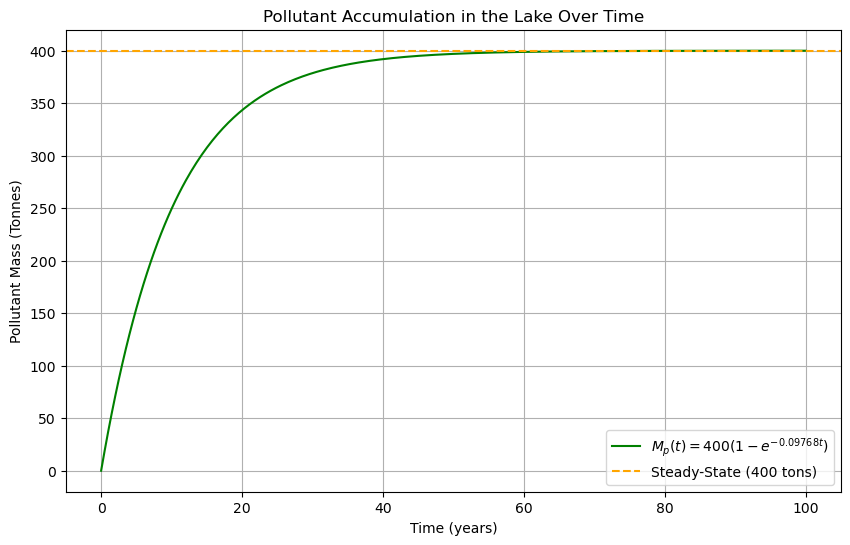

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pollutant mass function M_p(t) based on our solution
def M_p(t):
    return 400 * (1 - np.exp(-0.09768 * t))

# Create a time grid from t=0 to t=50 (in years)
t_vals = np.linspace(0, 100, 400)

# Compute M_p for each t
M_vals = M_p(t_vals)

# Plot
plt.figure(figsize=(10,6))
plt.plot(t_vals, M_vals, label=r'$M_p(t) = 400 (1 - e^{-0.09768t})$', color='green')
plt.axhline(400, linestyle="--", color="orange", label="Steady-State (400 tons)")
plt.xlabel("Time (years)")
plt.ylabel("Pollutant Mass (Tonnes)")
plt.title("Pollutant Accumulation in the Lake Over Time")
plt.legend()
plt.grid(True)
plt.show()


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 2. a)

 Draw the concordia for the U-Pb system.

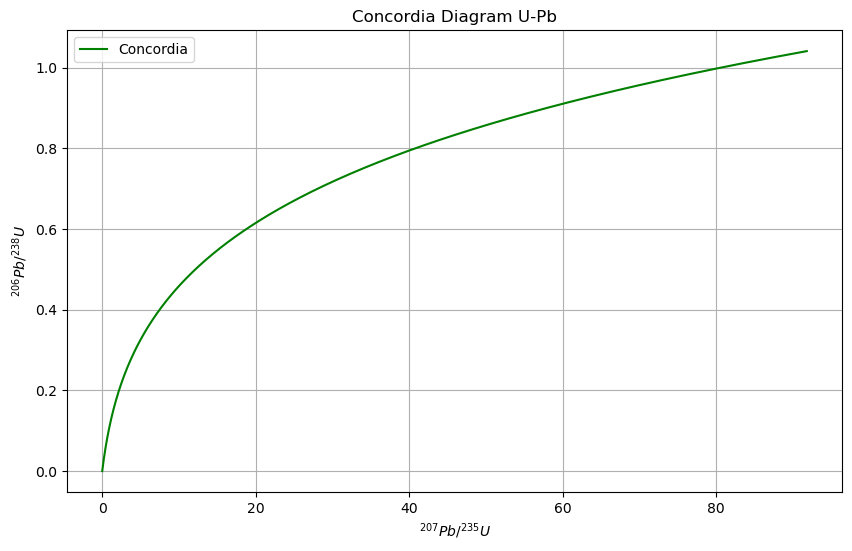

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (in 1/year)
lambda_235 = 9.8485e-10  # Decay constant for 235U → 207Pb
lambda_238 = 1.55125e-10  # Decay constant for 238U → 206Pb

# Function for concordia curve
def concordia_curve(age_min=0, age_max=4600, points=500):
    t = np.linspace(age_min, age_max, points)  # Generate time values in Myr
    y = np.exp(lambda_235 * t * 1e6) - 1  # 206Pb/238U
    x = np.exp(lambda_238 * t * 1e6) - 1  # 207Pb/235U
    return x, y

# Generate the concordia curve
x, y = concordia_curve()

# Plot the Concordia Curve
plt.figure(figsize=(10,6))
plt.plot(y, x, label="Concordia", color='green')
plt.xlabel(r"$^{207}Pb/^{235}U$")
plt.ylabel(r"$^{206}Pb/^{238}U$")
plt.title("Concordia Diagram U-Pb")
plt.legend()
plt.grid()
plt.show()


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 2. b)

Plot the U-Pb isotope data for a zircon grain given in Table 1 on your concordia and infer the mineral’s formation age. The measurement errors need not be considered.

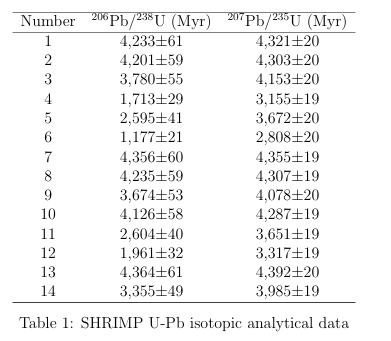

Age of the Sample: 180.36 Ma


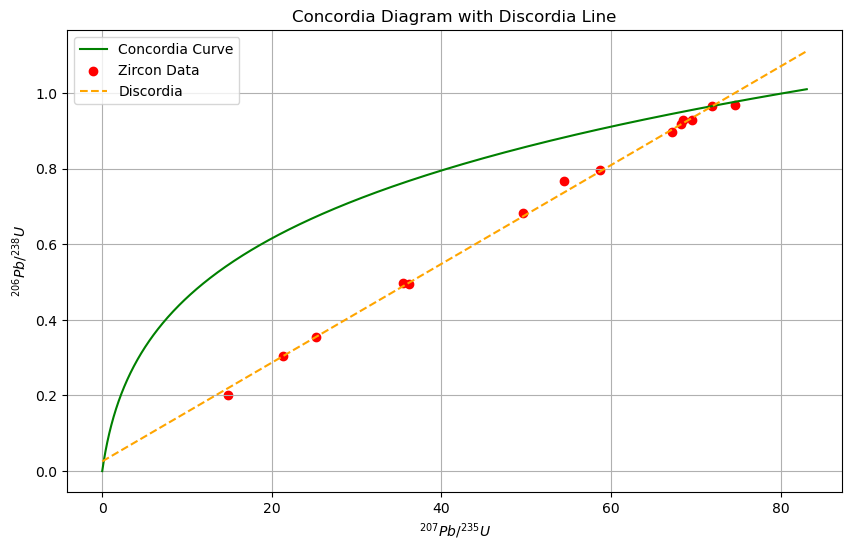

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Decay constants (1/yr)
lambda_235 = 9.8485e-10  # 235U → 207Pb
lambda_238 = 1.55125e-10  # 238U → 206Pb

# Define function to calculate concordia curve
def concordia(t):
    """ Returns 206Pb/238U and 207Pb/235U ratios for given age (t in years) """
    pb206_u238 = np.exp(lambda_238 * t) - 1
    pb207_u235 = np.exp(lambda_235 * t) - 1
    return pb206_u238, pb207_u235

# Generate Concordia Curve
t_values = np.linspace(0, 4.5e9, 500)  # Time range from 0 to 4.5 Ga
pb206_u238_vals, pb207_u235_vals = concordia(t_values)

# SHRIMP U-Pb zircon data from table 1
zircon_pb206_u238_t = np.array([4233, 4201, 3780, 1713, 2595, 1177, 4356, 4235, 3674, 4126, 2604, 1961, 4364, 3355]) * 1e6
zircon_pb207_u235_t = np.array([4321, 4303, 4153, 3155, 3672, 2808, 4355, 4307, 4078, 4287, 3651, 3317, 4392, 3985]) * 1e6

# Convert ages to isotope ratios
pb206_u238_data, pb207_u235_data = concordia(zircon_pb206_u238_t)[0], concordia(zircon_pb207_u235_t)[1]

# Fit a line for discordia
params = np.polyfit(pb207_u235_data, pb206_u238_data, 1)
slope, intercept = params

discordia = slope * Pb207_U235_vals + intercept
intersection_idx = np.argmin(np.abs(discordia - pb206_u238_vals))
rate_x = pb207_u235_vals[intersection_idx]
t_concordia = np.log(1 + rate_x) / λ235

print(f"Age of the Sample: {t_concordia/1e6:.2f} Ma")

# Plot the Concordia and Discordia

plt.figure(figsize=(10, 6))
plt.plot(pb207_u235_vals, pb206_u238_vals, label="Concordia Curve", color="green")
plt.scatter(pb207_u235_data, pb206_u238_data, color="red", label="Zircon Data")
plt.plot(pb207_u235_vals, discordia, label="Discordia", linestyle="--", color="orange")
plt.xlabel(r"$^{207}Pb/^{235}U$", fontsize=label_fontsize)
plt.ylabel(r"$^{206}Pb/^{238}U$", fontsize=label_fontsize)
plt.title("Concordia Diagram with Discordia Line", fontsize=title_fontsize)
plt.legend()
plt.grid(True)
plt.show()


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 3. a)

Fission-track dating was performed on two minerals in a sample. The track date from garnet was 700 Ma and the date from muscovite was 540 Ma. Determine the cooling rate for these minerals in °C Ma−1

<img src="Picture1.png" alt="Picture1" width="400"/>

From the graphic we can extract the temperatures. </br>
Garnet= 310°C</br>
Muscovite= 150°C

In [23]:
# Data
T_garnet = 310  #temperature of garnet in °C
T_muscovite = 150  #temperature of muscovite in °C

t_garnet = 700  # Fission-track age of garnet in Ma
t_muscovite = 540  # Fission-track age of muscovite in Ma

# Calculate the cooling rate using the formula: (ΔT / Δt)
cooling_rate = (T_garnet - T_muscovite) / (t_garnet - t_muscovite)
cooling_rate  # Cooling rate in °C/Ma
print(f"Cooling rate in °C/Ma: {cooling_rate:.2f}")

Cooling rate in °C/Ma: 1.00


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 3. b)

Determine the closure temperatures for these minerals.

Using the cooling rate, in the graph we can see: </br>
Closure temperature of garnet in °C =280</br>
Closure temperature of muscovite in °C = 120</br>

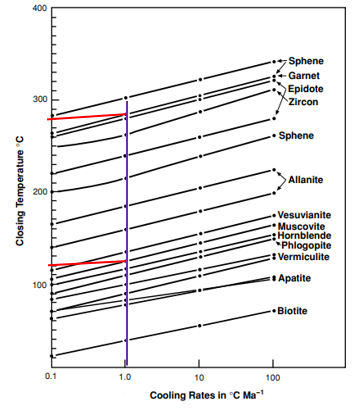

<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 3. c)

Assuming that cooling continued at this rate, calculate the track date that would be given by apatite and its closure temperature.

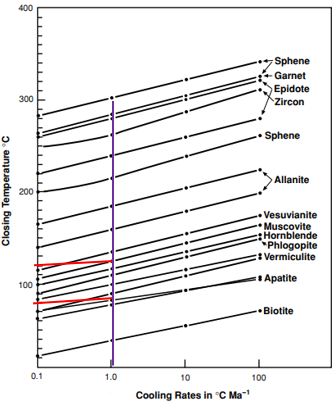

In [22]:
# Data
T_apatite = 70  # Closure temperature of apatite in °C
T_muscovite = 120  # Closure temperature of muscovite in °C

t_muscovite = 540  # Fission-track age of muscovite in Ma
cooling_rate = 1.0  # Cooling rate in °C/Ma 

# Calculate the fission-track age 
# t_apatite = t_muscovite - (ΔT / cooling_rate)
t_apatite = t_muscovite - (T_muscovite - T_apatite) / cooling_rate

t_apatite  # Fission-track age of apatite in Ma
print(f"Age (in Ma): {t_apatite:.2f}")


Age (in Ma): 490.00


<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 3. d)

Would a biotite fission-trak date be useful?

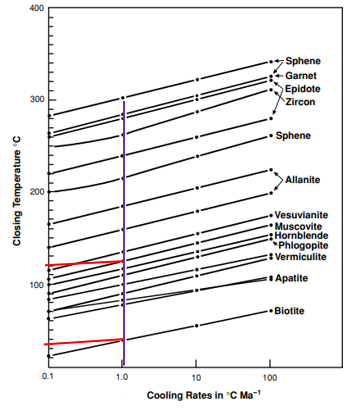

In [25]:
# Data
T_biotite = 25  # Closure temperature of biotite in °C
T_muscovite = 120  # Closure temperature of muscovite in °C

t_muscovite = 540  # Fission-track age of muscovite in Ma
cooling_rate = 1.0  # Cooling rate in °C/Ma 

# Calculate the fission-track age 
# t_biotite = t_muscovite - (ΔT / cooling_rate)
t_biotite = t_muscovite - (T_muscovite - T_biotite) / cooling_rate

t_biotite  # Fission-track age of apatite in Ma
print(f"Age (in Ma): {t_biotite:.2f}")


Age (in Ma): 445.00


Fission tracks in biotite could be useful, but certain considerations must be taken into account. According to the graph, its closure temperature is approximately 25°C, close to ambient temperature, and its fission-track age is 445 Ma, much more recent than the cases previously analyzed (apatite, muscovite, garnet). If the rock undergoes partial reheating, biotite could provide useful information; otherwise, it would not contribute much. Since the apatite age is already known, biotite might not be particularly relevant.

<p style="color:#C70039; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;">Point 4. a) and b)

Six samples of granodiorite from a pluton in British Columbia, Canada, have Sr and Rb isotopic compositions as shown in Table 2.

a. **Find the age of the intrusion.** </br>
b. **Find the initial ${}^{87}\text{Sr}/{}^{86}\text{Sr}$ ratio of the magma at the time of the intrusion.**

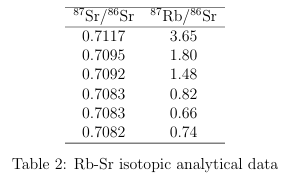

Slope (m): 0.00118
initial ratio: 0.70741

Age Calculation:
Age of the intrusion (in years): 8.28e+07
Age of the intrusion (in Ma): 82.79


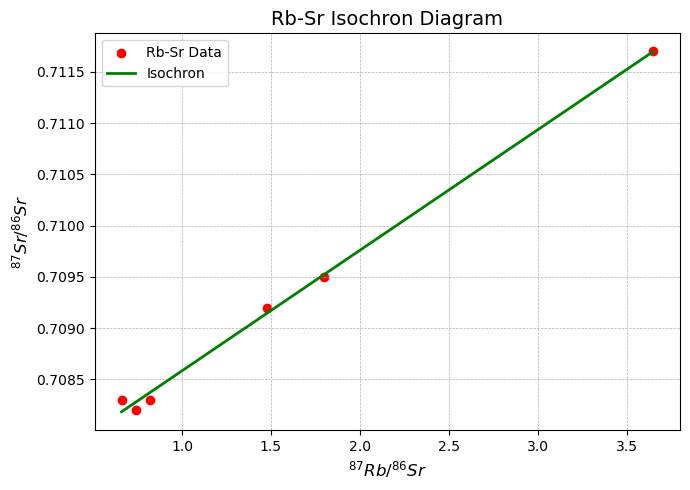

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Data: x = 87Rb/86Sr, y = 87Sr/86Sr
x = np.array([3.65, 1.80, 1.48, 0.82, 0.66, 0.74])
y = np.array([0.7117, 0.7095, 0.7092, 0.7083, 0.7083, 0.7082])

n = len(x)

# Calculate the necessary sums
Sx = sum(x)
Sy = sum(y)
Sxx = sum(xi**2 for xi in x)
Sxy = sum(xi * yi for xi, yi in zip(x, y))

# Calculate the slope (m) and intercept (b)
m = (n * Sxy - Sx * Sy) / (n * Sxx - Sx**2)
b = (Sy - m * Sx) / n

# Decay constant for 87Rb -> 87Sr
lam = 1.42e-11  # in yr^-1

# Calculate age using the relation: m = e^(lambda*t) - 1  =>  t = ln(1+m) / lambda
t = math.log(1 + m) / lam

# Generate x values for the regression line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = b + m * x_fit

# Create the plot
plt.figure(figsize=(7,5))

# Plot the data points
plt.scatter(x, y, color='red', marker='o', label="Rb-Sr Data")

# Plot the best-fit line
plt.plot(x_fit, y_fit, color='green', linewidth=2, label="Isochron")

# Display text with calculated values
text_x = min(x) + (max(x) - min(x)) * 0.05
text_y = max(y) - (max(y) - min(y)) * 0.1


# Labels and title
plt.xlabel(r'$^{87}Rb/^{86}Sr$', fontsize=12)
plt.ylabel(r'$^{87}Sr/^{86}Sr$', fontsize=12)
plt.title("Rb-Sr Isochron Diagram", fontsize=14)

# Customize grid and legend
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

# Print results
print(f"Slope (m): {m:.5f}")
print(f"initial ratio: {b:.5f}")
print("\nAge Calculation:")
print(f"Age of the intrusion (in years): {t:.2e}")
print(f"Age of the intrusion (in Ma): {t/1e6:.2f}")

# Show plot
plt.show()
